<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Machine-learning-handson/blob/main/Regression_with_statsmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
taiwan = pd.read_csv('/content/taiwan_real_estate2.csv')
print(taiwan.info())
print(taiwan.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dist_to_mrt_m    414 non-null    float64
 1   n_convenience    414 non-null    int64  
 2   house_age_years  414 non-null    object 
 3   price_twd_msq    414 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB
None
       dist_to_mrt_m  n_convenience  price_twd_msq
count     414.000000     414.000000     414.000000
mean     1083.885689       4.094203      11.491738
std      1262.109595       2.945562       4.116940
min        23.382840       0.000000       2.299546
25%       289.324800       1.000000       8.381241
50%       492.231300       4.000000      11.633888
75%      1454.279000       6.000000      14.099849
max      6488.021000      10.000000      35.552194


In [4]:
#correlate between y variable(dependent variable - price) and X_variable - number of convienience
print(taiwan['price_twd_msq'].corr(taiwan['n_convenience']))

0.5710049111111482


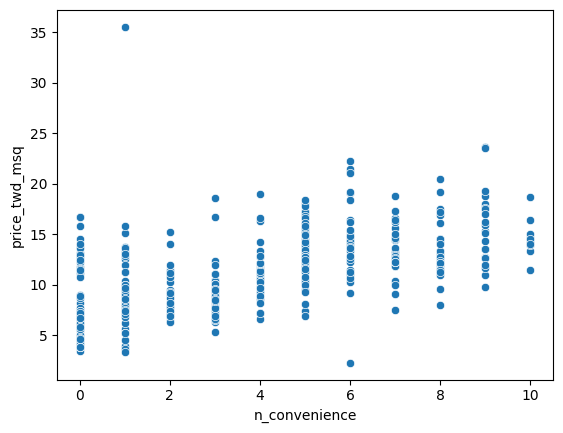

In [7]:
#Visualize
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=taiwan)
plt.show()

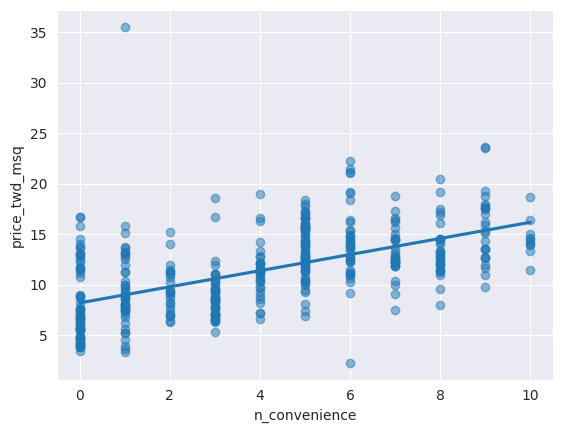

In [9]:
#Drawing a trendline
sns.set_style('darkgrid')
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan,
         ci=None,
         scatter_kws={'alpha': 0.5})
#Scatter_kws reduces the transparency of the data values to 50%
plt.show()


From the plot: Estimating the intercept(y when x = 0)
Intercept = 9
slope = y2 - y1/ x2-x1 = 5/6 = 0.833

In [13]:
#Running a linear regression model to confirm our estimates

from statsmodels.formula.api import ols #ols is a type of regreeion (ordinary least squares)

n_convenience_vs_price = ols('price_twd_msq ~ n_convenience', data = taiwan)

#Fit in the model
n_convenience_vs_price = n_convenience_vs_price.fit()

#To print the intercept and slope
print(n_convenience_vs_price.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


Equation:
y = 8.224237 + 0.798080 * n_convenience